# 데이터 불러오기

In [3]:
!pip install datasets

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 데이터셋

In [6]:
# 데이터로드
from datasets import load_dataset

# 데이터셋 로드
dataset = load_dataset('yoonyooo/gamedataset')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Resolving data files:   0%|          | 0/1237 [00:00<?, ?it/s]

# v1-2 모델 Usage

In [7]:
!pip install --upgrade diffusers transformers scipy

### 테스트

In [8]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline

model_id = "stabilityai/stable-diffusion-2-1"
device = "cuda"


pipe = StableDiffusionPipeline.from_pretrained(model_id)
pipe = pipe.to(device)
prompt = """In a mystical land forgotten by time, ancient temples rise from dense jungles, hiding a powerful artifact capable of shaping the world's destiny. Lush vegetation and exotic wildlife fill the ruins. Many have tried to find this artifact, but none have succeeded.You are Elena Drake, a renowned archaeologist and adventurer with piercing green eyes, wavy brown hair, and a determined demeanor. Known for your sharp intellect and unyielding spirit, you are equipped with ancient maps and tools, ready to uncover history's greatest treasure. Navigate through the jungle, solve stone-carved riddles, and battle fierce guardians to claim the artifact.
Overcome every challenge and use your expertise to unlock the mysteries of the past. The fate of the world depends on your success"""
with autocast("cuda"):
  image = pipe(prompt).images[0]

image.save("result1.png")

/usr/local/lib/python3.10/dist-packages/xformers/ops/fmha/flash.py:211: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_fwd")
/usr/local/lib/python3.10/dist-packages/xformers/ops/fmha/flash.py:344: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_bwd")


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (151 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [". known for your sharp intellect and unyielding spirit, you are equipped with ancient maps and tools, ready to uncover history's greatest treasure. navigate through the jungle, solve stone - carved riddles, and battle fierce guardians to claim the artifact. overcome every challenge and use your expertise to unlock the mysteries of the past. the fate of the world depends on your success"]


  0%|          | 0/50 [00:00<?, ?it/s]

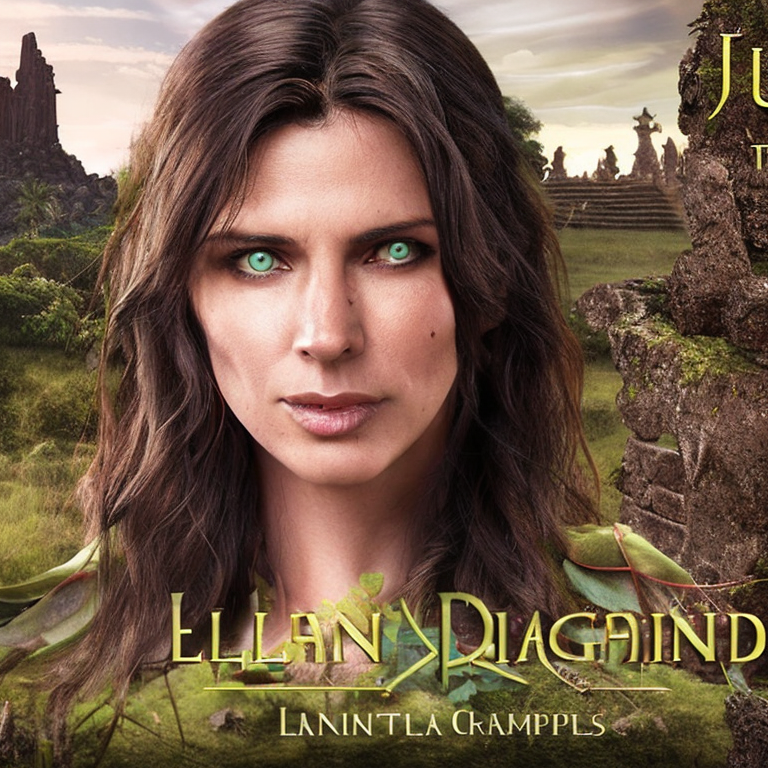

In [9]:
from PIL import Image

Image.open("result1.png")

In [10]:
from diffusers import StableDiffusionPipeline, LMSDiscreteScheduler

model_id = "stabilityai/stable-diffusion-2-1"
# Use the K-LMS scheduler here instead
scheduler = LMSDiscreteScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", num_train_timesteps=1000)
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, use_auth_token=True)
pipe = pipe.to("cuda")
prompt = """One day, a giant tortoise named 'Emperor Turtles' and his clan took over the peaceful mushroom kingdom. The innocent mushroom kingdom's inhabitants were all turned into rocks, bricks, bamboo shoots, etc. by Turtles' magic, and the kingdom quickly declined. In the Mushroom Kingdom, there is a princess who has the mysterious power to release evil magic and revive the kingdom, but the princess, 'Princess Lilly,' has been kidnapped by Turtlox and is waiting for someone to rescue her. After learning about this situation, brothers 'Max' and 'Leo' decide to fight against the Turtlenecks for peace in the Mushroom Kingdom. Can the two rescue Princess Lily safely from their evil grasp?"""
with autocast("cuda"):
    image = pipe(prompt, guidance_scale=7.5).images[0]

image.save("result2.png")

Keyword arguments {'use_auth_token': True} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:201: FutureWarning: The configuration file of this scheduler: LMSDiscreteScheduler {
  "_class_name": "LMSDiscreteScheduler",
  "_diffusers_version": "0.30.0.dev0",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "steps_offset": 0,
  "timestep_spacing": "linspace",
  "trained_betas": null,
  "use_karras_sigmas": false
}
 is outdated. `steps_offset` should be set to 1 instead of 0. Please make sure to update the config accordingly as leaving `steps_offset` might led to incorrect results in future versions. If you have downloaded this checkpoint from the Hugging Face Hub, it would be very nice if you could open a Pull request for the `scheduler/scheduler_config.json` file
  deprecate("steps_offset!=1", "1.0.0", deprecation_message, standard_warn=False)
Token indices sequence length is l

  0%|          | 0/50 [00:00<?, ?it/s]

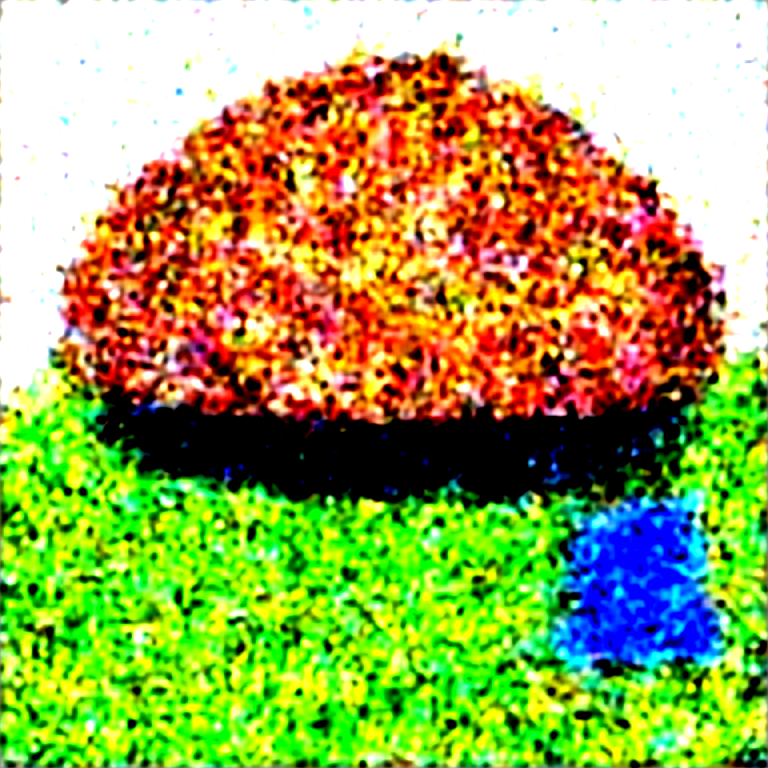

In [11]:
Image.open("result2.png")

# Train 코드 작성

## Dataset 구축

In [12]:
df = pd.read_csv('/content/drive/MyDrive/dataset/all_images_caption.csv', encoding='cp949')
df

file_name                                            caption
0       v9.png  A young male character with short brown hair a...
1       v8.png  A graceful female archer stands poised with he...
2       v7.png  A tall, muscular character with short silver h...
3       v6.png  A fierce, elegant female warrior stands poised...
4       v5.png  A graceful, ethereal character with long blond...
...        ...                                                ...
1230  1001.png  The character is a large, quadrupedal creature...
1231  1000.png  The character in the image is a multi-armed hu...
1232   100.png  A playful and vibrant character with bright gr...
1233    10.png  A vibrant character with a youthful appearance...
1234     1.png  A strong and athletic female character with a ...

[1235 rows x 2 columns]

In [13]:
df[df['file_name'] == 'tera1.png']
## 학습 데이터를 확인하니, 캐릭터에 대한 묘사 뿐만 아니라 배경에 대한 정보도 같이 captioning 된다.

file_name                                            caption
85  tera1.png  The character has long, wavy silver hair casca...

# 모델 config 설정

In [14]:
import pandas as pd
import os
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from transformers import AutoTokenizer

class ImageCaptionDataset(Dataset):
    def __init__(self, image_dir, dataframe, tokenizer_name="bert-base-uncased", transform=None):
        self.image_dir = image_dir
        self.dataframe = dataframe
        self.image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]
        self.tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)
        self.transform = transform if transform else transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.ToTensor(),
            transforms.Normalize([0.5], [0.5])
        ])
        self.caption_dict = {row['file_name']: row['caption'] for _, row in dataframe.iterrows()}

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        file_name = self.image_files[idx]
        caption = self.caption_dict[file_name]
        image_path = os.path.join(self.image_dir, file_name)

        # Load image
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        # Tokenize caption
        tokens = self.tokenizer(caption, return_tensors='pt', padding='max_length', truncation=True, max_length=77)

        return image, tokens.input_ids.squeeze(), tokens.attention_mask.squeeze()


# Specify the image directory (modify this path as necessary)
image_dir = '/content/extracted_files'

# Create the dataset
dataset = ImageCaptionDataset(image_dir=image_dir, dataframe=df)

# Print the length of the dataset to confirm it's loaded correctly
print(f"Dataset size: {len(dataset)}")


Dataset size: 1235


In [15]:
from torch.utils.data import DataLoader

dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

#Text to Image train

In [16]:
!git clone https://github.com/huggingface/diffusers
!cd diffusers
!pip install ./diffusers/.

fatal: destination path 'diffusers' already exists and is not an empty directory.
Processing ./diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.30.0.dev0-py3-none-any.whl size=2467700 sha256=35d0ccaf8c62bdfae60c43b70d69c24290adacbdfa4e5a94d14c3ca878e8b0c9
  Stored in directory: /tmp/pip-ephem-wheel-cache-at6kb6g3/wheels/95/c5/3b/e1b4269f8a2584de57e75f949a185b48fc4144e9a91fc9965a
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.30.0.dev0
    Uninstalling diffusers-0.30.0.dev0:
      Successfully uninstalled diffusers-0.30.0.dev0


In [17]:
!pip install -r ./diffusers/examples/text_to_image/requirements.txt

In [18]:
!accelerate config default

Configuration already exists at /root/.cache/huggingface/accelerate/default_config.yaml, will not override. Run `accelerate config` manually or pass a different `save_location`.


In [19]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: fineGr

In [20]:
!pip install xformers

In [21]:
# 최신 버전의 torch 및 torchvision 설치
!pip install torch torchvision --upgrade

# 필요한 기타 라이브러리 설치
!pip install accelerate transformers diffusers


In [25]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: fineGr

In [35]:
!pip install accelerate diffusers transformers

In [37]:
from datasets import load_dataset

# 데이터셋 로드
dataset = load_dataset("yoonyooo/gamedataset")

# 열 이름 출력
print(dataset["train"].column_names)

Resolving data files:   0%|          | 0/1237 [00:00<?, ?it/s]

['image', 'caption']


In [40]:
!accelerate launch /content/diffusers/examples/text_to_image/train_text_to_image.py \
  --pretrained_model_name_or_path="stabilityai/stable-diffusion-2-1" \
  --dataset_name="yoonyooo/gamedataset" \
  --use_ema \
  --resolution=512 --center_crop --random_flip \
  --train_batch_size=8 \
  --gradient_accumulation_steps=4 \
  --gradient_checkpointing \
  --max_train_steps=1000 \
  --learning_rate=1e-05 \
  --max_grad_norm=1 \
  --enable_xformers_memory_efficient_attention \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --output_dir="sD-data-model" \
  --push_to_hub --hub_model_id='yoonyooo/sddatamodel' \
  --caption_column='caption'

/usr/local/lib/python3.10/dist-packages/xformers/ops/fmha/flash.py:211: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_fwd")
/usr/local/lib/python3.10/dist-packages/xformers/ops/fmha/flash.py:344: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_bwd")
2024-07-29 05:37:06.167344: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-29 05:37:06.167393: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to 

In [23]:
from torch.utils.data import DataLoader

dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

In [43]:
from diffusers import StableDiffusionPipeline
import torch

pipeline = StableDiffusionPipeline.from_pretrained("/content/sD-data-model", torch_dtype=torch.float16, use_safetensors=True).to("cuda")

image = pipeline(prompt="""in a mystical land forgotten by time, ancient temples rise from dense jungles, hiding a powerful artifact capable of shaping the world's destiny. Lush vegetation and exotic wildlife fill the ruins. Many have tried to find this artifact, but none have succeeded.You are Elena Drake, a renowned archaeologist and adventurer with piercing green eyes, wavy brown hair, and a determined demeanor. Known for your sharp intellect and unyielding spirit, you are equipped with ancient maps and tools, ready to uncover history's greatest treasure. Navigate through the jungle, solve stone-carved riddles, and battle fierce guardians to claim the artifact.
Overcome every challenge and use your expertise to unlock the mysteries of the past. The fate of the world depends on your succes""").images[0]
image.save("test1.png")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (152 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [". known for your sharp intellect and unyielding spirit, you are equipped with ancient maps and tools, ready to uncover history's greatest treasure. navigate through the jungle, solve stone - carved riddles, and battle fierce guardians to claim the artifact. overcome every challenge and use your expertise to unlock the mysteries of the past. the fate of the world depends on your succes"]


  0%|          | 0/50 [00:00<?, ?it/s]

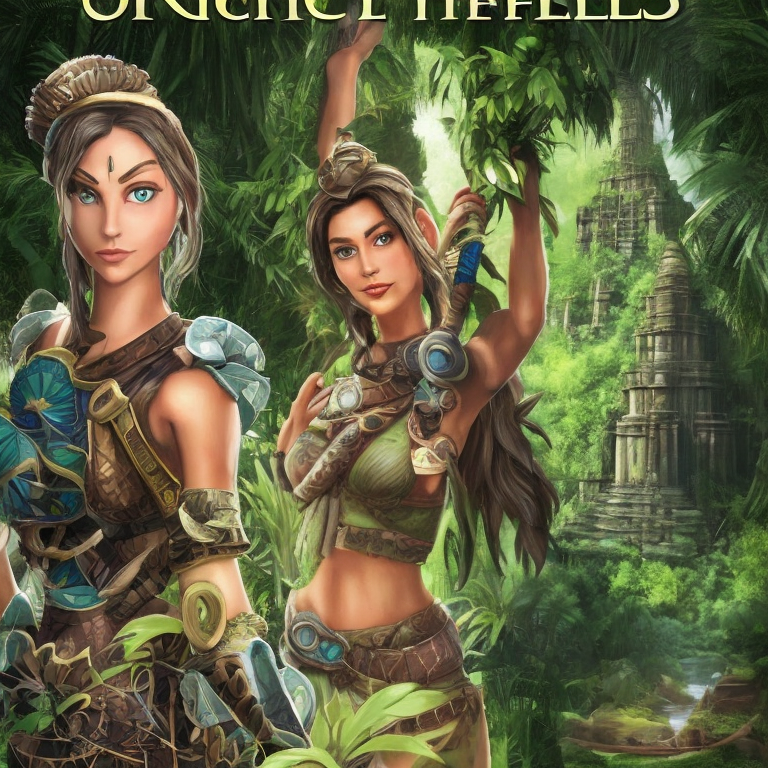

In [44]:
from PIL import Image
Image.open("test1.png")

In [45]:
from diffusers import StableDiffusionPipeline
import torch

pipeline = StableDiffusionPipeline.from_pretrained("/content/sD-data-model", torch_dtype=torch.float16, use_safetensors=True).to("cuda")

image = pipeline(prompt="""One day, a giant tortoise named 'Emperor Turtles' and his clan took over the peaceful mushroom kingdom. The innocent mushroom kingdom's inhabitants were all turned into rocks, bricks, bamboo shoots, etc. by Turtles' magic, and the kingdom quickly declined. In the Mushroom Kingdom, there is a princess who has the mysterious power to release evil magic and revive the kingdom, but the princess, 'Princess Lilly,' has been kidnapped by Turtlox and is waiting for someone to rescue her. After learning about this situation, brothers 'Max' and 'Leo' decide to fight against the Turtlenecks for peace in the Mushroom Kingdom. Can the two rescue Princess Lily safely from their evil grasp?""").images[0]
image.save("test2.png")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (141 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["the princess,'princess lilly,' has been kidnapped by turtlox and is waiting for someone to rescue her. after learning about this situation, brothers'm ax'and'leo'decide to fight against the turtlenecks for peace in the mushroom kingdom. can the two rescue princess lily safely from their evil grasp?"]


  0%|          | 0/50 [00:00<?, ?it/s]

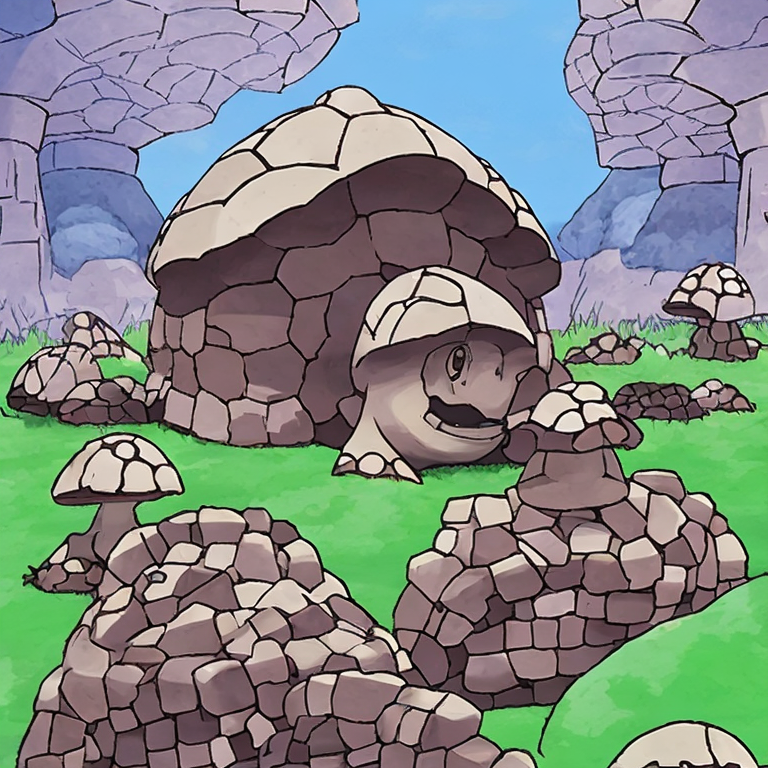

In [46]:
from PIL import Image
Image.open("test2.png")

In [58]:
from diffusers import StableDiffusionPipeline
import torch

pipeline = StableDiffusionPipeline.from_pretrained("/content/sD-data-model", torch_dtype=torch.float16, use_safetensors=True).to("cuda")

image = pipeline(prompt="A girl game character crying while holding a teddy bear").images[0]
image.save("test3.png")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

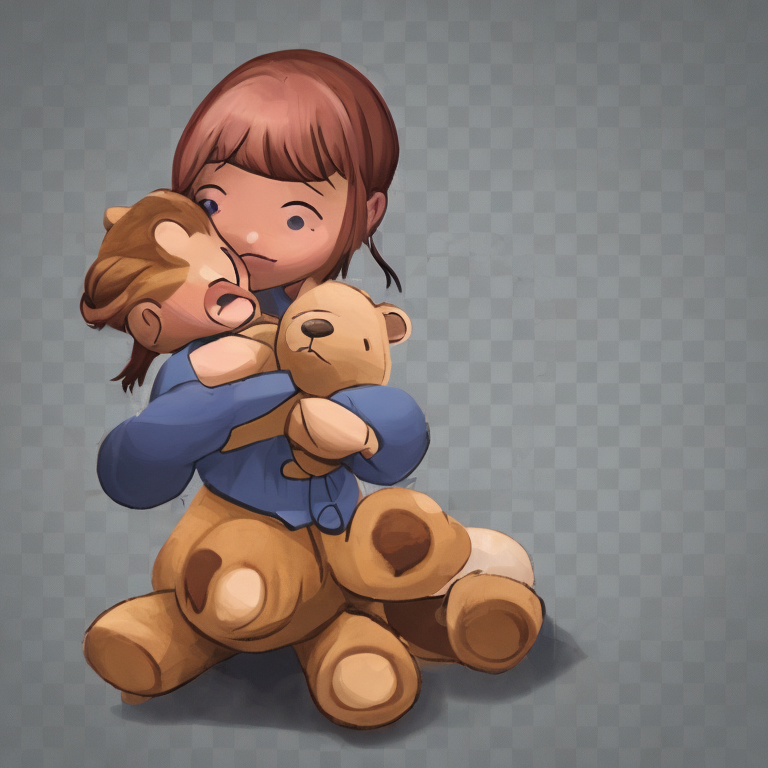

In [59]:
from PIL import Image
Image.open("test3.png")

In [60]:
from shutil import copyfile
import os

In [61]:
import shutil
# Step 2: 로컬 폴더와 Google Drive 목적지 설정
local_folder = '/content/sD-data-model'  # 옮길 로컬 폴더 경로
drive_folder = '/content/drive/MyDrive/target_folder'  # Google Drive 내 목적지 폴더 경로

# 목적지 폴더가 없으면 생성
if not os.path.exists(drive_folder):
    os.makedirs(drive_folder)

# Step 3: 폴더의 모든 파일을 Google Drive로 복사
for filename in os.listdir(local_folder):
    src_path = os.path.join(local_folder, filename)
    dst_path = os.path.join(drive_folder, filename)
    if os.path.isfile(src_path):
        shutil.copy(src_path, dst_path)

    elif os.path.isdir(src_path):
        shutil.copytree(src_path, dst_path)

print("폴더가 Google Drive로 성공적으로 옮겨졌습니다.")

폴더가 Google Drive로 성공적으로 옮겨졌습니다.
